# Grupowanie obiektów

Grupowanie (analiza skupień, klasteryzacja) (ang. data clustering) jest pojęciem z zakresu eksploracji danych 
oraz uczenia maszynowego, wywodzącym się z szerszego pojęcia, jakim jest uczenie bez nadzoru.

Jest to metoda dokonująca grupowania elementów we względnie jednorodne klasy. Podstawą grupowania w większości 
algorytmów jest podobieństwo pomiędzy elementami – wyrażone przy pomocy funkcji odległości (metryki) lub podobieństwa. 


 ## Grupowanie metodą k-średnich
 
Grupowanie k-średnich to jedna z najczęściej stosowanych metod grupowania. Algorytm próbuje
podzielić obiekty na k grup, z których każda ma z grubsza podobną wariancję. Liczba grup k
jest podawana za pomocą parametru.

1. Punkty „środkowe” są tworzone w losowo wybranych miejscach.
2. Dla każdej obserwacji:
a. obliczana jest odległość między obserwacją i punktami środkowymi k;
b. obserwacja zostaje przypisana do klastra, którego punkt środkowy znajduje się najbliżej.
3. Punkty środkowe są przenoszone na środek odpowiadających im klastrów.
4. Kroki 2. i 3. są powtarzane, dopóki żadna obserwacja nie zmienia klastra.
Na tym etapie algorytm zostaje uznany za zbieżny i kończy działanie.

Wymagania algorytmu k-średnich.

1. W grupowaniu za pomocą k-średnich przyjmuje się założenie, że grupa ma kształt wypukły, na przykład okręgu,
kuli itd. (nie może to być rodzaj "kiszki" ) 

2. Wszystkie cechy powinny byc równo skalowane i dlatego powinno się stosować standaryzację cech.

3. Grupy są zrównoważone, czyli zawierają z grubsza tę samą liczbę obserwacji. 

Jeżeli uważamy, że nie uda się spełnić wymienionych wyżej wymagań, nalezy wybróbować inną metodę grupowania.

Patrz także:
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html




In [2]:
#Polecenie usuwa wszystkie zmienne z pamięci
%reset -f 

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

dataset = pd.read_csv('./dane/serce.csv')

features = dataset.iloc[:,[0,3]]     #Wiek i cisnienie krwi (tylko dwa atrybuty do grupowania)          

#scaler = StandardScaler ()
#sFeatures = scaler.fit_transform(features)

sFeatures = features

kmeans = KMeans(n_clusters=5, #Liczba skupień
                init='k-means++',
                n_init=10,
                max_iter=300, #Maksymalna liczba iteracji algorytmu
                random_state=0, #Ustawienie ziarna generatora liczb pseudo-losowych                
               )

kmeans.fit(sFeatures) #Grupowanie

inertia = kmeans.inertia_
print("Miara jakości=",inertia);

centroids = kmeans.cluster_centers_
print("Centroidy: \n",centroids)



Miara jakości= 22231.031183609663
Centroidy: 
 [[ 49.81395349 107.44186047]
 [ 57.68055556 142.94444444]
 [ 60.85714286 123.42857143]
 [ 44.86363636 127.37878788]
 [ 61.80769231 168.        ]]


### Wizualizacja skupień obliczonych metodą k-means

   wiek  cisnienie_krwi_spoczynek
0  70.0                     130.0
1  67.0                     115.0
2  57.0                     124.0
3  64.0                     128.0
4  74.0                     120.0


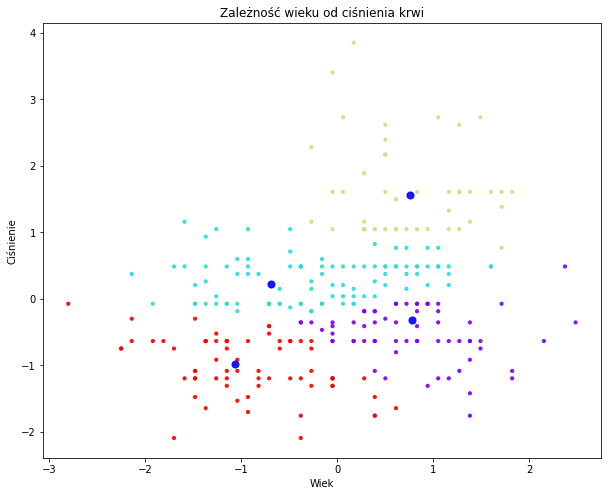

In [3]:
#Polecenie usuwa wszystkie zmienne z pamięci 
%reset -f 

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

%matplotlib inline


dataset = pd.read_csv('./dane/serce.csv')
features = dataset.iloc[:,[0,3]]     #Wiek i cisnienie krwi (tylko dwa atrybuty do grupowania)          

print(features.head()) #Pokazanie co zostało wybrane

scaler = StandardScaler ()
sFeatures = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=4,init='k-means++',n_init=10,max_iter=1000,random_state=0)
kmeans.fit(sFeatures)
centroidsKMeans = kmeans.cluster_centers_
centroidsKMeansX = centroidsKMeans[:,0]
centroidsKMeansY = centroidsKMeans[:,1]

clusters = kmeans.fit_predict(features)

x = sFeatures[:, 0]
y = sFeatures[:, 1]

plt.figure(figsize=(10, 8))
plt.title('Zależność wieku od ciśnienia krwi')
plt.scatter(x, y, s=10, c = clusters, alpha=0.9, cmap='rainbow')
plt.scatter(centroidsKMeansX, centroidsKMeansY, s=50,  color="blue", alpha=0.9)
plt.xlabel("Wiek")
plt.ylabel("Ciśnienie")
plt.show()



### Przypisanie obiektów do skupień (grup)

In [5]:
#Polecenie usuwa wszystkie zmienne z pamięci 
%reset -f 

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def myformat(number):
    return "{0:.4f}".format(float(number))


datasetTrain = pd.read_csv('./dane/serce_train.csv')
datasetTest = pd.read_csv('./dane/serce_test.csv')

noColumn = datasetTrain.shape[1]

features_train = datasetTrain.iloc[:,[0,3]]     #Wiek i cisnienie krwi (tylko dwa atrybuty do grupowania)          
features_test = datasetTest.iloc[:,[0,3]]     #Wiek i cisnienie krwi (tylko dwa atrybuty do grupowania)          

scaler = StandardScaler ()
sFeaturesTrain = scaler.fit_transform(features_train)
sFeaturesTest = scaler.fit_transform(features_test)

kmeans = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,random_state=0)
kmeans.fit(sFeaturesTrain)

#Przypisanie obiektów do skupień (grup, klastrów)
clusters = kmeans.fit_predict(sFeaturesTest)

#Wypisanie skupień dla pierwszych 10 obiektów 
for i in range(0,10):
    print("Obiekt numer:"+str(i+1)," Skupienie:"+str(clusters[i]))

Obiekt numer:1  Skupienie:1
Obiekt numer:2  Skupienie:1
Obiekt numer:3  Skupienie:2
Obiekt numer:4  Skupienie:1
Obiekt numer:5  Skupienie:1
Obiekt numer:6  Skupienie:2
Obiekt numer:7  Skupienie:2
Obiekt numer:8  Skupienie:2
Obiekt numer:9  Skupienie:0
Obiekt numer:10  Skupienie:2


### Optymalizacja liczby skupień metodą "łokcia"

*** Eksperyment numer:1 Jakość= 540.0000000000005
*** Eksperyment numer:2 Jakość= 310.52299261785123
*** Eksperyment numer:3 Jakość= 209.47250370344725
*** Eksperyment numer:4 Jakość= 165.84178655513657
*** Eksperyment numer:5 Jakość= 135.3353687374184
*** Eksperyment numer:6 Jakość= 110.56226861168264
*** Eksperyment numer:7 Jakość= 94.7318168881344
*** Eksperyment numer:8 Jakość= 82.43642367023041
*** Eksperyment numer:9 Jakość= 71.63314243323161


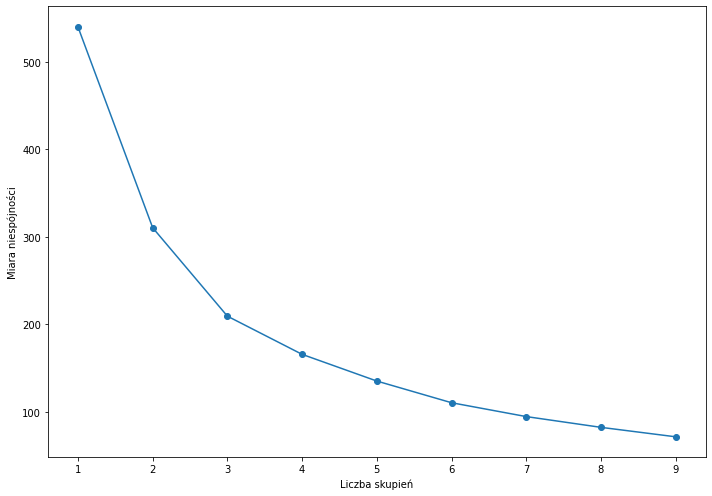

In [6]:
#Polecenie usuwa wszystkie zmienne z pamięci 
%reset -f 

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

%matplotlib inline


dataset = pd.read_csv('./dane/serce.csv')
noColumn = dataset.shape[1]
features = dataset.iloc[:,[0,3]] #Wiek i cisnienie krwi (tylko dwa atrybuty warunkowe)

NO_EXPERIMENTS = 10

scaler = StandardScaler ()
sFeatures = scaler.fit_transform(features)

results = []
for k in range(1, NO_EXPERIMENTS):
        
    #Utworzenie obiektu do grupowania    
    kmeans = KMeans(n_clusters=k,init='k-means++',n_init=10,max_iter=300,random_state=0)
    kmeans.fit(sFeatures)
    
    #Obliczenie jakości grupowania
    #Miara niespójności skupień: suma kwadratów odległości obiektów do środka najbliższego skupienia
    inertia = kmeans.inertia_ #Powinna być jak najmniejsza
    
    results.append(inertia)
    
    print("*** Eksperyment numer:"+str(k)+" Jakość=",inertia)

#Na podstawie poniższego wykresu wybieramy takie k, które jest bliskie punktu przegięcia 
#Widać, że w tym przypadku optymalne k=3

fig = plt.figure(figsize=(10, 7))
plt.plot(range(1,NO_EXPERIMENTS), results , marker='o')
plt.xlabel('Liczba skupień')
plt.ylabel('Miara niespójności')
plt.tight_layout()
plt.show()



Liczebność:
cluster
0    2180
1     922
2     231
Name: count, dtype: int64
REZYGN      0    1
cluster           
0        1878  302
1         842   80
2         130  101


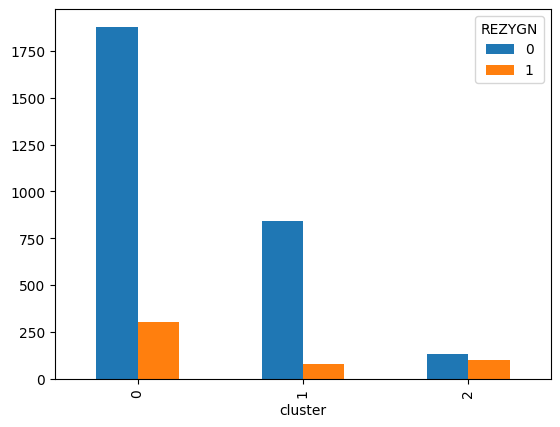

[1 0 0 2 1]
[1]


In [28]:
#Zad 1. Firma świadcząca usługi telekomunikacyjne chce wykonać eksplorację swoich danych celem odkrycia wiedzy 
#użytecznej do przewidywania możliwości rezygnacji klientów z pewnej usługi. Dane firmy znajdują się 
#w pliku rezygnacje.csv.
#Do eksploracji wytypowano grupowanie obiektów. Ponadto, na podstawie wcześniejszych analiz ustalono, 
#że do grupowania należy użyć tylko następujące atrybuty: PLAN_MIEDZY i POCZTA_G. 
#Ponadto, grupowanie ma być wykonane metodą k-średnich (k-means) z liczbą środków 3 i odległością euklidesową. 
#Wykonaj grupowanie obiektów, a następnie poniższe polecenia.
#
#1. podać liczebności wszystkich 3 skupień, 
#2. scharakteryzować wszystkie skupienia z punktu widzenia wartości atrybutu REZYGN (chodzi o podanie informacji
#ile w każdym skupieniu jest klientów, którzy zrezygowali z usługi i takich, którzy nie zrezygmowali z usługi); 
#przedstawić tę charakterystykę na wykresie słupkowym,
#3. dla 5 ostatnich obiektów w danych podać do jakiego skupienia należą,                                                                                   
#4. za pomocą skonstruowanego wyżej modelu grupowania sklasyfikować do odpowiedniego skupienia klienta, który
#ma wyłączoną pocztę głosową (POCZTA_G=0), ale ma włączony plan międzynarodowy (PLAN_MIEDZY=1).

import pandas as pd
from sklearn.cluster import KMeans

data = pd.read_csv('rezygnacje.csv')

# tylko do KMeans
X = data.loc[:, ['PLAN_MIEDZY', 'POCZTA_G']]

K_srednich = KMeans(
    n_clusters=3,
    init='k-means++',
)

K_srednich.fit(X)

# etykiety klastrów do pełnego df (z REZYGN)
data['cluster'] = K_srednich.labels_

liczebnosc = data['cluster'].value_counts()
print(f"Liczebność:\n{liczebnosc}")

df_rezygn = pd.crosstab(data['cluster'], data['REZYGN'])
print(df_rezygn)

df_rezygn.plot(kind='bar')
plt.show()

ostatnie_5 = data.tail(5)[['PLAN_MIEDZY', 'POCZTA_G']]
predicted_ostatnie_5 = K_srednich.predict(ostatnie_5)

print(predicted_ostatnie_5)

nowy_klient = pd.DataFrame({
    'PLAN_MIEDZY' : [0],
    'POCZTA_G' : [1]
})
predicted_poczta_0_plan_1 = K_srednich.predict(nowy_klient)

print(predicted_poczta_0_plan_1)

*** Eksperyment numer: 1  Jakość (inertia) = 6666.0
*** Eksperyment numer: 2  Jakość (inertia) = 2680.8523000040896
*** Eksperyment numer: 3  Jakość (inertia) = 1561.4388097384385
*** Eksperyment numer: 4  Jakość (inertia) = 1108.2498781004654
*** Eksperyment numer: 5  Jakość (inertia) = 865.2499572081781
*** Eksperyment numer: 6  Jakość (inertia) = 724.2949571038137
*** Eksperyment numer: 7  Jakość (inertia) = 637.1562614571774
*** Eksperyment numer: 8  Jakość (inertia) = 571.421458634262
*** Eksperyment numer: 9  Jakość (inertia) = 511.5323070533283


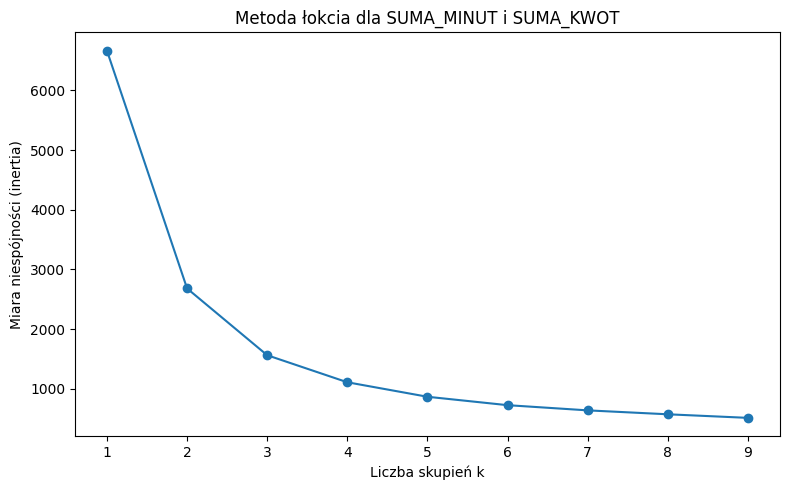

REZYGN      0    1
cluster           
0         724  251
1         694  103
2        1432  129


C:\Users\Kacper\AppData\Local\Temp\ipykernel_4084\572503145.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tablica['cluster'] = kmeans.labels_


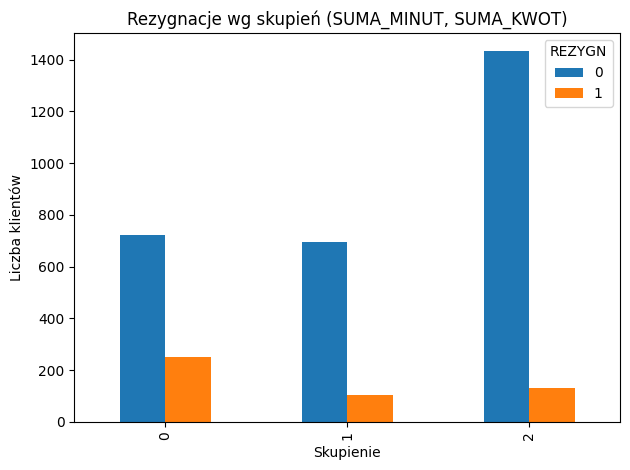

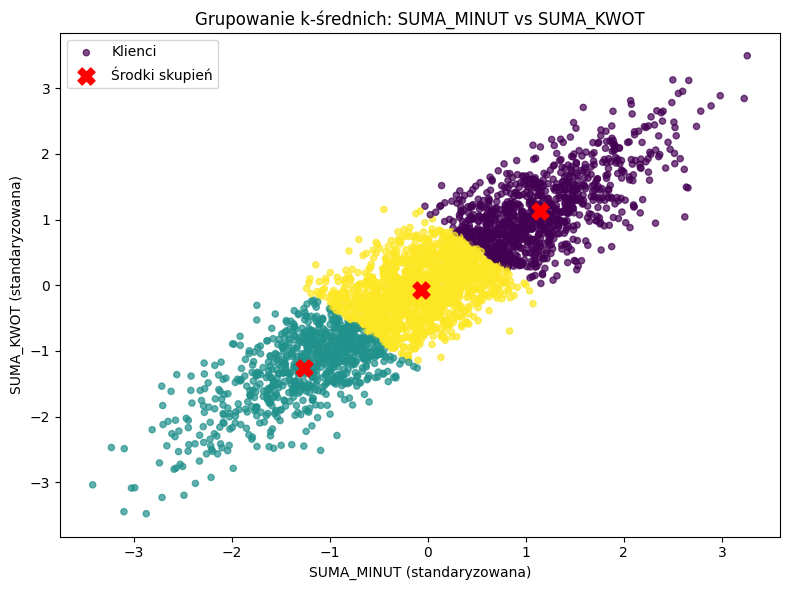

In [40]:
#Zad 2. Firma świadcząca usługi telekomunikacyjne chce wykonać eksplorację swoich danych celem odkrycia wiedzy 
#użytecznej do przewidywania możliwości rezygnacji klientów z pewnej usługi. Dane firmy znajdują się 
#w pliku rezygnacje.csv.
#Do eksploracji wytypowano grupowanie obiektów. Tym razem analizy mają dotyczyć dwóch parametrów klienta: 
#sumaryczna liczba minut rozmowy oraz sumaryczna kwota zapłacona za rozmowy.
#
#Sumaryczna liczba minut rozmowy dla danego klienta, to suma wartości z kolumn:
# DZIEN_MIN, WIECZOR_MIN, NOC_MIN, MIEDZY_MIN,
#
#Sumaryczna kwota zapłacona za rozmowy dla danego klienta, to suma wartości z kolumn:
# DZIEN_OPLATA,WIECZ_OPLATA,NOC_OPLATA,MIEDZY_OPLATA
#
#Do grupowania należy użyć tylko te dwa parametry. Grupowanie ma być wykonane metodą k-średnich (k-means) 
#z odległością euklidesową, ale nie jest od początku znana liczba środków. 
#
#Wykonaj następujące polecenia.

#1. wygenerować nową tablicę z 3 atrybutami: SUMA_MINUT (sumaryczna liczba minut), SUMA_KWOT (sumaryczna kwota 
#zapłacona za rozmowy) oraz REZYGN i zapisać ją na dysku

#2. Metodą łokcia wyznaczyć optymalną liczbę skupień dla atrybutów SUMA_MINUT i SUMA_KWOT oraz wykonać  
#optymalne grupowanie.

#3. Scharakteryzować wszystkie skupienia z punktu widzenia wartości atrybutu REZYGN (chodzi o podanie informacji
#ile w każdym skupieniu jest klientów, którzy zrezygowali z usługi i takich, którzy nie zrezygmowali z usługi; 
#przedstawić tę charakterystykę na wykresie słupkowym.

#4 Wykonaj wizualizację w dwóch wymiarach wyniku grupowania pokazując środki skupień na tle punktów reprezentujących 
#wiersze z danych.

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv('rezygnacje.csv')

df['SUMA_MINUT'] = df['DZIEN_MIN'] + df['WIECZOR_MIN'] + df['NOC_MIN'] + df['MIEDZY_MIN']
df['SUMA_KWOT']  = df['DZIEN_OPLATA'] + df['WIECZ_OPLATA'] + df['NOC_OPLATA'] + df['MIEDZY_OPLATA']

tablica = df[['SUMA_MINUT', 'SUMA_KWOT', 'REZYGN']]
tablica.to_csv('.rezygnacje_wyn.csv', index = False)

X = tablica[['SUMA_MINUT', 'SUMA_KWOT']].values

NO_EXPERIMENTS = 10

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

results = []
for k in range(1, NO_EXPERIMENTS):
    kmeans_tmp = KMeans(
        n_clusters=k,
        init='k-means++',
        n_init=10,
        max_iter=300,
        random_state=0
    )
    kmeans_tmp.fit(X_scaled)
    inertia = kmeans_tmp.inertia_
    results.append(inertia)
    print(f"*** Eksperyment numer: {k}  Jakość (inertia) = {inertia}")

fig = plt.figure(figsize=(8, 5))
plt.plot(range(1, NO_EXPERIMENTS), results, marker='o')
plt.xlabel('Liczba skupień k')
plt.ylabel('Miara niespójności (inertia)')
plt.title('Metoda łokcia dla SUMA_MINUT i SUMA_KWOT')
plt.tight_layout()
plt.show()

n_clu = 3

kmeans = KMeans(
    n_clusters=n_clu,
    init='k-means++'
)
kmeans.fit(X_scaled)
tablica['cluster'] = kmeans.labels_

tab = pd.crosstab(tablica['cluster'], tablica['REZYGN'])
print(tab)

tab.plot(kind='bar')
plt.xlabel('Skupienie')
plt.ylabel('Liczba klientów')
plt.title('Rezygnacje wg skupień (SUMA_MINUT, SUMA_KWOT)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))

# punkty
plt.scatter(
    X_scaled[:, 0],
    X_scaled[:, 1],
    c=tablica['cluster'],
    cmap='viridis',
    s=20,
    alpha=0.7,
    label='Klienci'
)

# środki skupień
centers = kmeans.cluster_centers_
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    c='red',
    s=150,
    marker='X',
    label='Środki skupień'
)

plt.xlabel('SUMA_MINUT (standaryzowana)')
plt.ylabel('SUMA_KWOT (standaryzowana)')
plt.title('Grupowanie k‑średnich: SUMA_MINUT vs SUMA_KWOT')
plt.legend()
plt.tight_layout()
plt.show()

## Grupowanie metodą hierarchiczną i etykietowanie obiektów testowych

Grupowanie hierarchiczne lub aglomeracyjne to charakteryzujący się potężnymi możliwościami i elastycznością algorytm
klasteryzacji hierarchicznej. W tym algorytmie każdey obiekt na początku znajduje się we
własnej grupie. Następnie grupy spełniające określone kryteria są łączone ze sobą. Ten proces
jest powtarzany i powoduje zwiększanie się grup aż do osiągnięcia pewnego poziomu. W bibliotece
scikit-learn obiekt AgglomerativeClustering używa parametru *linkage* do określenia strategii
łączenia mającej na celu minimalizację następujących wartości:

1. Wariancji połączonych grup (ward).
2. Średniej odległości między obserwacjami w parze grup (average).
3. Maksymalnej odległości między obserwacjami w parze grup (complete).

Są jeszcze dwa inne użyteczne parametry. 

- affinity - określa współczynnik odległości używany przez parametr linkage (minkowski, euclidean itd.) 

- n_clusters - definiuje liczbę grup, które algorytm będzie próbował znaleźć. To oznacza sukcesywne łączenie klastrów, 
dopóki nie pozostanie ich tyle, ile wskazuje wartość parametru n_clusters.

Patrz także:
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html


In [7]:
#Polecenie usuwa wszystkie zmienne z pamięci 
%reset -f 

import pandas as pd
from sklearn.cluster import AgglomerativeClustering

datasetTrain = pd.read_csv('./dane/serce_train.csv')
datasetTest = pd.read_csv('./dane/serce_test.csv')

featuresTrain = datasetTrain.iloc[:,[0,3]]   #Wiek i cisnienie krwi (tylko dwa atrybuty do grupowania)          
featuresTest = datasetTest.iloc[:,[0,3]]     #Wiek i cisnienie krwi (tylko dwa atrybuty do grupowania)          

ac = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
ac.fit(featuresTrain)

clusters = ac.fit_predict(featuresTest)

for i in range(0,len(clusters)):
    print("Obiekt numer:"+str(i+1)," Skupienie:"+str(clusters[i]))


Obiekt numer:1  Skupienie:1
Obiekt numer:2  Skupienie:1
Obiekt numer:3  Skupienie:0
Obiekt numer:4  Skupienie:1
Obiekt numer:5  Skupienie:1
Obiekt numer:6  Skupienie:2
Obiekt numer:7  Skupienie:0
Obiekt numer:8  Skupienie:0
Obiekt numer:9  Skupienie:3
Obiekt numer:10  Skupienie:0


### Dwie wizualizacje grupowania hierarchicznego

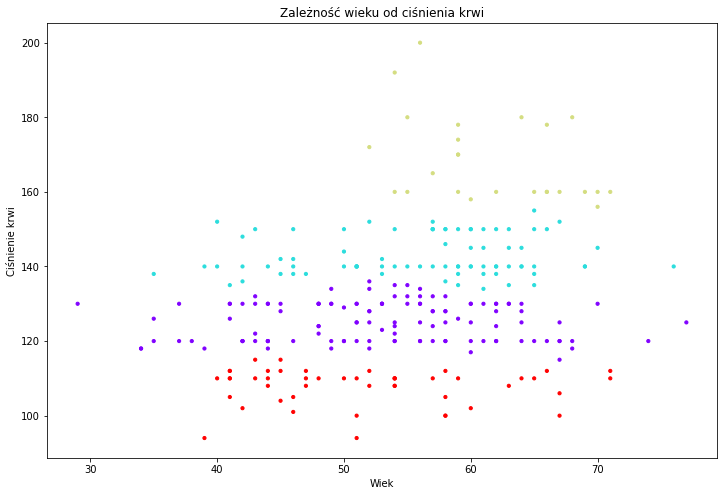

In [8]:
#Polecenie usuwa wszystkie zmienne z pamięci 
%reset -f 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

%matplotlib inline

dataset = pd.read_csv('./dane/serce.csv')

features = dataset.iloc[:,[0,3]] #Wiek i cisnienie krwi

ac = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
ac.fit(features)

clusters = ac.fit_predict(features)

x = np.ravel(features.iloc[:,[0]])
y = np.ravel(features.iloc[:,[1]])

plt.figure(figsize=(12, 8))
plt.title('Zależność wieku od ciśnienia krwi')
plt.scatter (x, y, c = clusters, s=10, alpha=0.99, cmap='rainbow')
plt.xlabel("Wiek")
plt.ylabel("Ciśnienie krwi")
plt.show()


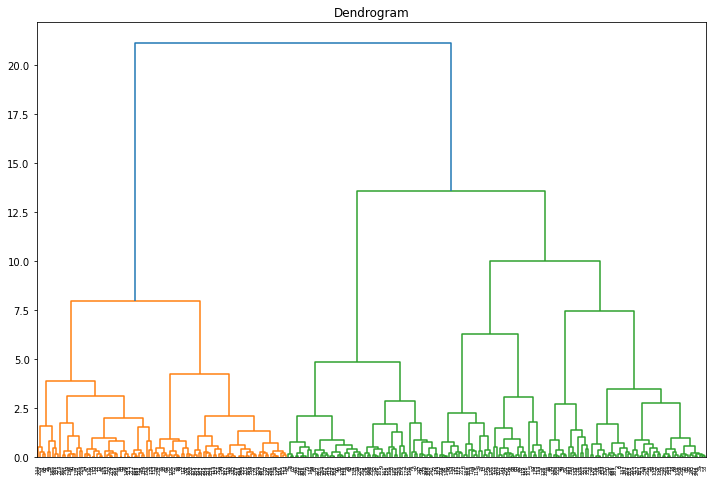

In [9]:
#Polecenie usuwa wszystkie zmienne z pamięci 
%reset -f 

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc

%matplotlib inline

dataset = pd.read_csv('./dane/serce.csv')

noColumn = dataset.shape[1]
featuresNS = dataset.iloc[:,[0,7]] #Wiek i cisnienie krwi

#print(featuresNS.head())

scaler = StandardScaler ()
features = scaler.fit_transform(featuresNS)

ac = AgglomerativeClustering(n_clusters=5, affinity='euclidean')
ac.fit(features)
#labels = ac.labels_

#print(labels)

#klastry = ac.fit_predict(features)


plt.figure(figsize=(12, 8))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(features, method='ward'))
plt.show()

In [ ]:
#Zad 3. Firma świadcząca usługi telekomunikacyjne chce wykonać eksplorację swoich danych celem odkrycia wiedzy 
#użytecznej do przewidywania możliwości rezygnacji klientów z pewnej usługi. Dane firmy znajdują się 
#w pliku rezygnacje.csv.
#Do eksploracji wytypowano grupowanie obiektów. Analizy mają dotyczyć dwóch parametrów klienta: 
#sumaryczna liczba minut rozmowy oraz sumaryczna kwota zapłacona za rozmowy.
#
#Sumaryczna liczba minut rozmowy dla danego klienta, to suma wartości z kolumn:
# DZIEN_MIN, WIECZOR_MIN, NOC_MIN, MIEDZY_MIN,
#
#Sumaryczna kwota zapłacona za rozmowy dla danego klienta, to suma wartości z kolumn:
# DZIEN_OPLATA,WIECZ_OPLATA,NOC_OPLATA,MIEDZY_OPLATA
#
#Do grupowania należy użyć tylko te dwa parametry. Grupowanie ma być wykonane metodą hierarchiczną. 
#
#Wykonaj następujące polecenia.

#1. Wygenerować nową tablicę z 3 atrybutami: SUMA_MINUT (sumaryczna liczba minut), SUMA_KWOT (sumaryczna kwota 
#zapłacona za rozmowy) oraz REZYGN i zapisać ją na dysku

#2.Wykonać optymalne grupowanie w taki sposób, aby liczba grup była podobna jak w Zadaniu 2.

#3. Scharakteryzować wszystkie skupienia z punktu widzenia wartości atrybutu REZYGN (chodzi o podanie informacji
#ile w każdym skupieniu jest klientów, którzy zrezygowali z usługi i takich, którzy nie zrezygmowali z usługi; 
#przedstawić tę charakterystykę na wykresie słupkowym.

#4. Wykonaj wizualizację w dwóch wymiarach wyniku grupowania pokazując kolory wierszy należacych do skupień

#5. Porównać otrzymane skupienia ze skupieniami uzyskanymi w Zadaniu 2 (czy coś je łączy).



## Grupowanie metodą gęstościową (algorytm DBSCAN) i etykietowanie obiektów testowych

Algorytm DBSCAN (ang. density-based spatial clustering of applications with noise — gęstościowa
klasteryzacja przestrzenna z uwzględnieniem szumu) powstał na bazie przekonania, że grupy pozwalają
na gęste upakowanie obserwacji. Nie są przyjmowane żadne założenia dotyczące kształtu grupy w przestrzeni cech.

Oto sposób działania tego algorytmu:

1. Wybierana jest losowa obserwacja x.

2. Jeżeli obserwacja x ma minimalną liczbę bliskich sąsiadów, wówczas jest uznawana za należącą do
grupy.

3. Krok 2. jest powtarzany rekurencyjnie dla wszystkich sąsiadów x, a następnie sąsiadów
tych sąsiadów itd. Te obserwacje tworzą jądro grupy.

4. Po wyczerpaniu najbliższych obserwacji w kroku 3. następuje losowy wybór nowego punktu i powrót
do kroku 1. 

Po zakończeniu przedstawionego tutaj procesu otrzymujemy zbiór obiektów dla wielu grup.
Każdy obiekt znajdujący się blisko grupy, ale nie zaliczony do jej jądra, jest uznawana za część
tej grupy. Natomiast wszelkie obiekty oddalone od grupy są uznawane za obserwacje odstające.

Algorytm DBSCAN używa trzech ważnych parametrów.

1. eps - maksymalna odległość między obserwacjami, aby można było je uznać za sąsiadujące.

2. min_samples - minimalna liczba obserwacji znajdujących się w odległości mniejszej niż eps od danej obserwacji, aby mogły zostać uznane za należące do jądra klastra.

3. metric - metryka odległości używana przez eps, na przykład minkowski lub euclidean.

Cechy algorytmu DBSCAN:

1. Najlepiej sprawdza się przy identyfikacji segmentów o nieregularnych (niewypukłych) kształtach.

2. Nie umożliwia definiowania liczby powstałych grup (liczbę grup można częściowo zmieniać poprzez zmianę parametrów modelu).

3. Wymaga zdefiniowania minimalnej liczby obserwacji potrzebnych do zbudowania grupy.

4. Wymaga zdefiniowania minimalnej odległości eps, która definiuje sąsiada.

5. Daje możliwość budowania grup o różnych (nieregularnych) kształtach (brak założenia o sferyczności grup, tak, jak w przypadku algorytmu k-średnich).

6. Nie wszystkie obserwacje muszą zostać przypisane do grup. Obserwacje niespełniające zakładanych kryteriów są uznawane za obserwacje odstające.

W przypadku algorytmu DBSCAN kluczowy jest dobór odpowiednich parametrów modelu. Choć parametrów nie ma wiele, to dobranie ich w taki sposób, by powstała „odpowiednia” liczba grup i obserwacje nietypowe nie stanowiły znaczącej części zbioru jest trudne.

Patrz także:
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html


In [10]:
#Polecenie usuwa wszystkie zmienne z pamięci 
%reset -f 

import pandas as pd
from sklearn.cluster import DBSCAN

dataset = pd.read_csv('./dane/serce.csv')

features = dataset.iloc[:,[0,7]]   #Wiek i cisnienie krwi (tylko dwa atrybuty do grupowania)          

db = DBSCAN(eps=7, min_samples=1, metric='euclidean')

db.fit(features)

labels = db.labels_
print(labels)

clusters = db.fit_predict(features)

#Wypisanie do jakich skupień należą obiekty
for i in range(0,len(clusters)):
    print("Obiekt numer:"+str(i+1)," Skupienie:"+str(clusters[i]))




[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]
Obiekt numer:1  Skupienie:0
Obiekt numer:2  Skupienie:0
Obiekt numer:3  Skupienie:0
Obiekt numer:4  Skupienie:0
Obiekt numer:5  Skupienie:0
Obiekt numer:6  Skupienie:0
Obiekt numer:7  Skupienie:0
Obiekt numer:8  Skupienie:0
Obiekt numer:9  Skupienie:0
Obiekt numer:10  Skupienie:0
Obiekt numer:11  Skupienie:0
Obiekt numer:12  Skupienie:0
Obiekt numer:13  Skupienie:0
Obiekt numer:14  Skupienie:0
Obiekt numer:15  Skupienie:0
Obiekt numer:16  Skupieni

### Wizualizacja grupowania gęstościowego

Etykiety grup dla obiektów: [-1 -1  0  0 -1  0  0  4  1  2  1  1  3 -1  0 -1  3  1 -1 -1  0  0 -1  4
  0  0  3  0  4 -1  0  5  6 -1 -1  0  1 -1  0  0 -1 -1  0 -1  0  1  0  4
  5  2 -1  0  1  1  0 -1  1  0 -1  0  2  0  0  2 -1  2  1  0  0  4  0  0
 -1 -1 -1  3 -1 -1  0  0 -1  6  2  0  4 -1  0 -1 -1 -1  1  0  0  4  0  4
  0 -1  1  0  4  0  0 -1  0  0 -1  2  1  4 -1  4 -1  0  0  0  0 -1  2  0
  0  0  2  5  0 -1  0  0  0  0 -1 -1  3  0  2  3  2  0  6  0 -1  1  1  0
 -1  0  4  4  0  4  4  0  4  0  0 -1  1  0  0 -1  6  2  0  0  4 -1  4  0
  3  1  5 -1 -1  0  6  1  1 -1 -1  0  0  0  4 -1  0  0  0  4  1  5  1 -1
  4 -1  0  0 -1  4 -1 -1  0  0  0  1 -1  2 -1 -1  0 -1 -1  0  0  0 -1  0
 -1 -1  0  0  4  1  2  0 -1 -1  0  0  2  0 -1 -1  4  0  0  5  1  0  3  0
 -1 -1  0  1  1  0 -1 -1  1 -1  0  0  4  4  2  5  2  0  1 -1  0  0  0  0
  4 -1  0  1  1  5]


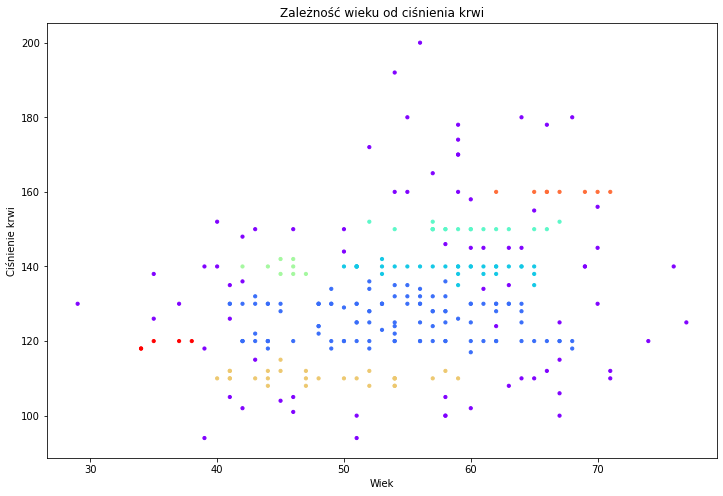

In [11]:
#Polecenie usuwa wszystkie zmienne z pamięci 
%reset -f 

import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

dataset = pd.read_csv('./dane/serce.csv')

features = dataset.iloc[:,[0,3]] #Wiek i cisnienie krwi

db = DBSCAN(eps=3, min_samples=5, metric='euclidean')
db.fit(features)

labels = db.labels_
print("Etykiety grup dla obiektów:",labels)

clusters = db.fit_predict(features)

x = np.ravel(features.iloc[:,[0]])
y = np.ravel(features.iloc[:,[1]])

plt.figure(figsize=(12, 8))
plt.title('Zależność wieku od ciśnienia krwi')
plt.scatter (x, y, c = clusters, s=10, alpha=0.99, cmap='rainbow')
plt.xlabel("Wiek")
plt.ylabel("Ciśnienie krwi")
plt.show()


In [73]:
#Zad 4. Firma świadcząca usługi telekomunikacyjne chce wykonać eksplorację swoich danych celem odkrycia wiedzy 
#użytecznej do przewidywania możliwości rezygnacji klientów z pewnej usługi. Dane firmy znajdują się 
#w pliku rezygnacje.csv.
#Do eksploracji wytypowano grupowanie obiektów. Analizy mają dotyczyć dwóch parametrów klienta: 
#sumaryczna liczba minut rozmowy oraz sumaryczna kwota zapłacona za rozmowy.
#
#Sumaryczna liczba minut rozmowy dla danego klienta, to suma wartości z kolumn:
# DZIEN_MIN, WIECZOR_MIN, NOC_MIN, MIEDZY_MIN,
#
#Sumaryczna kwota zapłacona za rozmowy dla danego klienta, to suma wartości z kolumn:
# DZIEN_OPLATA,WIECZ_OPLATA,NOC_OPLATA,MIEDZY_OPLATA
#
#Do grupowania należy użyć tylko te dwa parametry. Grupowanie ma być wykonane metodą gęstościową DBSCAN. 
#
#Wykonaj następujące polecenia.

#1. Wygenerować nową tablicę z 3 atrybutami: SUMA_MINUT (sumaryczna liczba minut), SUMA_KWOT (sumaryczna kwota 
#zapłacona za rozmowy) oraz REZYGN i zapisać ją na dysku

#2.Wykonać optymalne grupowanie w taki sposób, aby liczba grup była podobna jak w Zadaniu 2 i 3.

#3. Scharakteryzować wszystkie skupienia z punktu widzenia wartości atrybutu REZYGN (chodzi o podanie informacji
#ile w każdym skupieniu jest klientów, którzy zrezygowali z usługi i takich, którzy nie zrezygmowali z usługi; 
#przedstawić tę charakterystykę na wykresie słupkowym.

#4. Wykonaj wizualizację w dwóch wymiarach wyniku grupowania pokazując kolory wierszy należacych do skupień

#5. Porównać otrzymane skupienia ze skupieniami uzyskanymi w Zadaniu 2 i 3 (czy coś je łączy).

import pandas as pd
from sklearn.cluster import DBSCAN

data = pd.read_csv('rezygnacje.csv')

# tylko do KMeans
data['SUMA_MINUT'] = (
    data['DZIEN_MIN'] +
    data['WIECZOR_MIN'] +
    data['NOC_MIN'] +
    data['MIEDZY_MIN']
)


data['SUMA_KASY'] = (
    data['DZIEN_OPLATA'] +
    data['WIECZ_OPLATA'] +
    data['NOC_OPLATA'] +
    data['MIEDZY_OPLATA']
)
X = data[['SUMA_MINUT','SUMA_KASY','REZYGN']]

X.to_csv('zd4_pliczek.csv', index=False)

print(X)

DB = DBSCAN(eps=3, min_samples=5, metric='euclidean')

DB.fit(X)



      SUMA_MINUT  SUMA_KASY  REZYGN
0          717.2      75.56       0
1          625.2      59.24       0
2          539.4      62.29       0
3          564.8      66.80       0
4          512.0      52.09       0
...          ...        ...     ...
3328       660.7      60.10       0
3329       585.4      63.53       0
3330       675.6      67.74       0
3331       517.6      57.53       0
3332       755.4      77.01       0

[3333 rows x 3 columns]


,eps,3
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None
